This code plots the CASCCAD low cloud data (zonally averaged) as a function of altitude and: i) month and ii) latitude.

Author: Alex Gonzalez (alex.gonzalez@whoi.edu). Oct 2023.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset
import pandas as pd
import netCDF4

#from cartopy import config
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#from cartopy.util import add_cyclic_point

from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
figfolder = '/Users/alexgonzalez/Google Drive/My Drive/ITCZ_sblm_1D/ERA5/figures/'

dri = '/Users/alexgonzalez/Google Drive/My Drive/CASCCAD/3D/'

fn  = 'CC_cusc3D_200701-201012_CFMIP2.5_R04_v76.nc'
data_cc = xr.open_dataset(dri+fn,engine='netcdf4')

dri = '/Users/alexgonzalez/Google Drive/My Drive/CASCCAD/3D/'

fn  = 'cusc3D_200701-201612_CFMIP2.5_3.1.2_v72.nc'
data = xr.open_dataset(dri+fn,engine='netcdf4')

In [3]:
data

<xarray.Dataset>
Dimensions:   (time: 120, lon: 144, lat: 72, alt: 40)
Coordinates:
  * time      (time) datetime64[ns] 2007-01-16T09:00:00 ... 2016-12-16T09:00:00
  * lon       (lon) float32 -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * alt       (alt) float32 0.24 0.72 1.2 1.68 2.16 ... 17.52 18.0 18.48 18.96
Data variables:
    all3D     (time, alt, lat, lon) float32 ...
    thin3D    (time, alt, lat, lon) float32 ...
    cu3D      (time, alt, lat, lon) float32 ...
    cuh3D     (time, alt, lat, lon) float32 ...
    cum3D     (time, alt, lat, lon) float32 ...
    cul3D     (time, alt, lat, lon) float32 ...
    cuall3D   (time, alt, lat, lon) float32 ...
    sc3D      (time, alt, lat, lon) float32 ...
    allsc3D   (time, alt, lat, lon) float32 ...
    transi3D  (time, alt, lat, lon) float32 ...
    cuusc3D   (time, alt, lat, lon) float32 ...
    sccu3D    (time, alt, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 2.1.1 (https://...
    Conventions:               CF-1.6
    Description:               Cu & Sc discrimination from GOCCP instant file...
    Version:                   cuscinstant72
    Author:                    Gregory Cesana GISS/CU
    history:                   Mon Feb 27 22:01:34 2023: cdo ensmean cusc3D_2...
    nco_openmp_thread_number:  1
    CDO:                       Climate Data Operators version 2.1.1 (https://...
    _FillValue:                -9999.0

In [4]:
lats = -30
latn = 30.
lonw = -125+1.25
lone = -90+1.25

lev0 = 700
lev1 = 1000
lon0_era = 235
lon1_era = 271.25

In [5]:
nmon = 12
month_np = np.arange(1,nmon+1,1)
month = xr.DataArray(month_np,coords=[month_np], dims=['month'])

In [6]:
sc_cc_init = data_cc['sc3D'].sel(lat=slice(lats,latn),lon=slice(lonw,lone))
#sc = data['sc3D'].sel(lat=slice(lats,latn),lon=slice(lonw,lone))

In [7]:
[nt,nalt,nlat,nlon] = sc_cc_init.shape

In [8]:
alt = sc_cc_init['alt']
lat = sc_cc_init['lat']
lon = sc_cc_init['lon']

In [9]:
nt

48

In [10]:
sc_np = np.zeros((nmon,nalt,nlat,nlon))
sc_cc_np = np.zeros((nmon,nalt,nlat,nlon))
for mm in range(0,nmon,1):
    sc_cc_np[mm,:,:,:] = data_cc['sc3D'][mm::12,:,:,:].sel(lat=slice(lats,latn),lon=slice(lonw,lone)).mean(dim='time').values
    
    sc_np[mm,:,:,:] = data['sc3D'][mm::12,:,:,:].sel(lat=slice(lats,latn),lon=slice(lonw,lone)).mean(dim='time').values

In [27]:
data_cc['sc3D'][0::12,:,:,:].sel(lat=slice(lats,latn),lon=slice(lonw,lone)).mean(dim='time').values.shape

(40, 24, 15)

In [28]:
data['sc3D'][0::12,:,:,:].sel(lat=slice(lats,latn),lon=slice(lonw,lone)).mean(dim='time').values.shape

(40, 24, 15)

In [11]:
sc_cc = xr.DataArray(sc_cc_np, coords=[month,alt,lat,lon], dims=['time','alt','lat','lon'])
sc = xr.DataArray(sc_np, coords=[month,alt,lat,lon], dims=['time','alt','lat','lon'])

In [12]:
data['sc3D'][0::12,:,:].sel(lat=slice(lats,latn),lon=slice(lonw,lone)).values.shape

(10, 40, 24, 15)

In [123]:
data['sc3D'][1::12,:,:,:].sel(alt=1.2,lat=slice(lats,latn),lon=slice(lonw,lone)).mean(dim='lon')

<xarray.DataArray 'sc3D' (time: 10, lat: 24)>
array([[0.0072655 , 0.00326897, 0.00185233, 0.00373626, 0.01016045,
        0.01594638, 0.03641881, 0.06003839, 0.08549185, 0.10010356,
        0.06587742, 0.04355142, 0.05687221, 0.01769004, 0.0095361 ,
        0.00367426, 0.03379748, 0.08877149, 0.11757796, 0.12170933,
        0.11442425, 0.10977374, 0.09959061, 0.09598608],
       [0.02451312, 0.01529567, 0.01251845, 0.00451899, 0.01662144,
        0.02344239, 0.04238904, 0.06504581, 0.04045711, 0.0337888 ,
        0.02096238, 0.02356534, 0.05390998, 0.0265465 , 0.00630466,
        0.00838102, 0.04747251, 0.12317491, 0.12730567, 0.09597112,
        0.0843318 , 0.0695834 , 0.05460393, 0.06521665],
       [0.0181609 , 0.01524578, 0.02027001, 0.02522375, 0.02025268,
        0.03810886, 0.03606739, 0.0508461 , 0.04509682, 0.05460684,
        0.05566316, 0.03516332, 0.00481983, 0.00261691, 0.00905752,
        0.00470453, 0.00457983, 0.01758122, 0.08553382, 0.16350058,
        0.19850893, 0.1404054 , 0.08263458, 0.06434891],
       [0.0494528 , 0.06579466, 0.06696718, 0.12503658, 0.15430242,
        0.20940106, 0.24515483, 0.30351344, 0.27124432, 0.15184441,
        0.09575372, 0.07295579, 0.07436144, 0.04266347, 0.01701345,
        0.04316345, 0.03985716, 0.07375349, 0.11765408, 0.10808845,
        0.13744523, 0.1445671 , 0.13719982, 0.078285  ],
...
       [0.0250232 , 0.01710675, 0.00850219, 0.01208268, 0.01205862,
        0.00412841, 0.01247085, 0.01342446, 0.029453  , 0.0353017 ,
        0.02514348, 0.05478084, 0.03362489, 0.01559201, 0.00909073,
        0.00222148, 0.00554477, 0.05343506, 0.1433299 , 0.11411969,
        0.10449602, 0.10156392, 0.09880417, 0.09298092],
       [0.01895216, 0.00829465, 0.01782307, 0.01910317, 0.02782886,
        0.02386587, 0.01875716, 0.02025115, 0.02399306, 0.02883099,
        0.0390019 , 0.04527104, 0.09526725, 0.06831892, 0.00967912,
        0.00213773, 0.01453486, 0.00517892, 0.06072346, 0.13392235,
        0.15014645, 0.12354823, 0.15905799, 0.0458734 ],
       [0.01185615, 0.03051122, 0.04132959, 0.04888161, 0.08729097,
        0.12151013, 0.11270866, 0.0998713 , 0.07898033, 0.04575993,
        0.03078673, 0.05732751, 0.05953062, 0.03146933, 0.00647711,
        0.00171968, 0.00378543, 0.00473169, 0.01290474, 0.03478844,
        0.05368921, 0.04076175, 0.07136685, 0.07158089],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2007-02-14T21:00:00 ... 2016-02-15T09:00:00
  * lat      (lat) float32 -28.75 -26.25 -23.75 -21.25 ... 23.75 26.25 28.75
    alt      float32 1.2

In [13]:
# land-sea mask
fn_lsm = '/Volumes/alex.gonzalez/ERA5_smooth_clm/lsm_era5.nc'# load the land-sea mask here and do a where statement further down   
data_lsm = xr.open_dataset(fn_lsm)
lsm_hres = data_lsm['lsm'][0,::-1,:].sel(latitude=slice(lats,latn),longitude=slice(lon0_era,lon1_era)).values

In [14]:
lsm_lres = lsm_hres[5::10,5::10]
lsm_lres.shape

(24, 15)

In [15]:
sc['lat']

<xarray.DataArray 'lat' (lat: 24)>
array([-28.75, -26.25, -23.75, -21.25, -18.75, -16.25, -13.75, -11.25,  -8.75,
        -6.25,  -3.75,  -1.25,   1.25,   3.75,   6.25,   8.75,  11.25,  13.75,
        16.25,  18.75,  21.25,  23.75,  26.25,  28.75], dtype=float32)
Coordinates:
  * lat      (lat) float32 -28.75 -26.25 -23.75 -21.25 ... 23.75 26.25 28.75

In [16]:
lsm_lres_xr = xr.DataArray(lsm_lres, coords=[sc['lat'],sc['lon']], dims=['lat','lon'])

In [17]:
# land-sea mask
#dri = '/Users/alexgonzalez/Downloads/'#'/Volumes/alex.gonzalez/'
#fn_lsm = 'TRMM_TMPA_LandSeaMask.2.nc4'# load the land-sea mask here and do a where statement further down   
#data_lsm = xr.open_dataset(dri+fn_lsm)
#lsm = data_lsm['landseamask'][5::10,5::10].sel(lat=slice(lats,latn),lon=slice(lonw,lone))
#lsm

In [29]:
sc_cc_yz = sc_cc.mean(dim=('lon')) #.where(lsm_lres_xr==0)
sc_cc_yz

<xarray.DataArray (time: 12, alt: 40, lat: 24)>
array([[[0.02525249, 0.01855725, 0.01562338, ..., 0.04102275,
         0.03418284, 0.0433032 ],
        [0.10262228, 0.08581539, 0.08412778, ..., 0.09060872,
         0.08445017, 0.07832885],
        [0.11888233, 0.11311859, 0.13548182, ..., 0.08481528,
         0.08110488, 0.06430564],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.00633769, 0.00235128, 0.00317593, ..., 0.04188002,
         0.0533886 , 0.05131239],
        [0.02438831, 0.02079367, 0.02362429, ..., 0.09492155,
         0.08992108, 0.08591046],
        [0.04643181, 0.04931362, 0.05083127, ..., 0.0879289 ,
         0.08021323, 0.06909703],
...
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.00715248, 0.00490205, 0.00540518, ..., 0.03408757,
         0.04166718, 0.04457126],
        [0.06365967, 0.05253139, 0.07037465, ..., 0.1041653 ,
         0.119597  , 0.09968676],
        [0.13658394, 0.11902211, 0.14277224, ..., 0.11257008,
         0.12475505, 0.08741875],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]])
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * alt      (alt) float32 0.24 0.72 1.2 1.68 2.16 ... 17.52 18.0 18.48 18.96
  * lat      (lat) float32 -28.75 -26.25 -23.75 -21.25 ... 23.75 26.25 28.75

In [30]:
sc_yz = sc.mean(dim=('lon')) #.where(lsm_lres_xr==0)
sc_yz

<xarray.DataArray (time: 12, alt: 40, lat: 24)>
array([[[0.00262197, 0.00249478, 0.00237661, ..., 0.02875767,
         0.02790876, 0.04330527],
        [0.01668222, 0.01090494, 0.00933412, ..., 0.07130309,
         0.06745023, 0.07342177],
        [0.07051916, 0.0579232 , 0.06266781, ..., 0.08293456,
         0.06494421, 0.0572323 ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.00083088, 0.00045963, 0.0005369 , ..., 0.02325411,
         0.02669869, 0.05455823],
        [0.00472859, 0.00293526, 0.00336701, ..., 0.07995236,
         0.08483667, 0.08259987],
        [0.02488563, 0.02398256, 0.0227546 , ..., 0.11180013,
         0.09642141, 0.07434353],
...
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.0024775 , 0.0036517 , 0.00187659, ..., 0.02518074,
         0.0304406 , 0.04564055],
        [0.014256  , 0.01077073, 0.00754168, ..., 0.07752734,
         0.08097385, 0.0920398 ],
        [0.07505627, 0.06788668, 0.06657837, ..., 0.12550671,
         0.11296511, 0.07745377],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]])
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * alt      (alt) float32 0.24 0.72 1.2 1.68 2.16 ... 17.52 18.0 18.48 18.96
  * lat      (lat) float32 -28.75 -26.25 -23.75 -21.25 ... 23.75 26.25 28.75

In [33]:
# create density contour array based on min and max values
lev_sc = np.arange(5., 55., 5.)
color_map_blu = plt.cm.get_cmap('Blues')

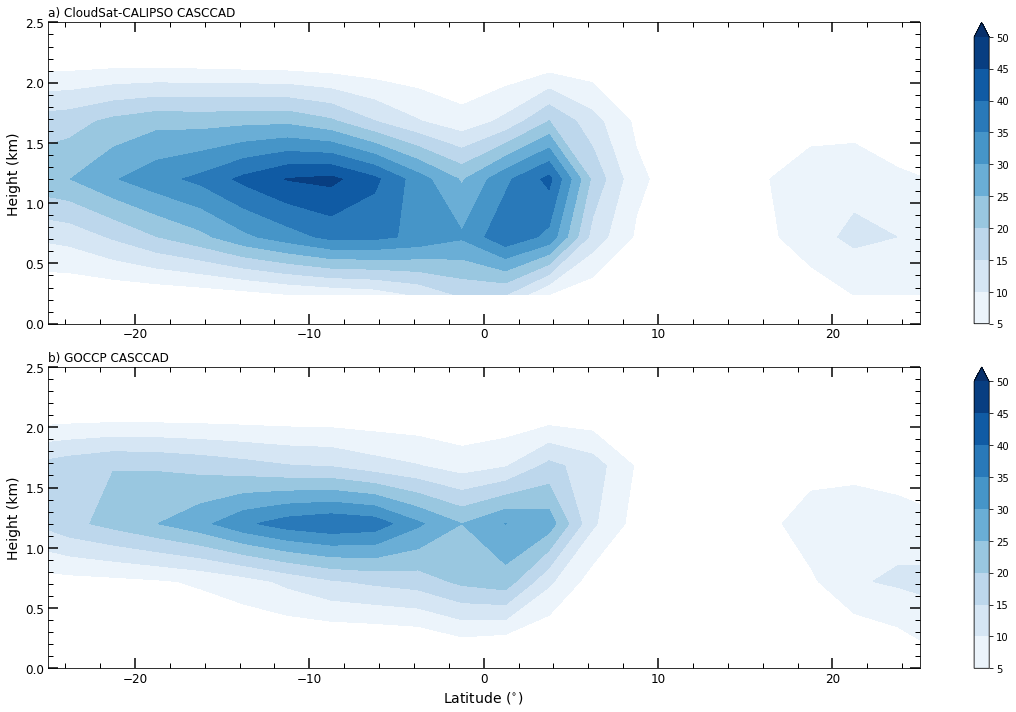

In [55]:
npan = 2
# all of the sizes are double the size they'll be in the paper
fig = plt.figure(figsize=(16, 10))#, tight_layout='true')
for j in range(0,npan,1):
   ax1 = fig.add_subplot(npan,1,j+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=12, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=12, right='True', top='True')
   ax1.tick_params(axis='x', labelsize=12)
   ax1.tick_params(axis='y', labelsize=12)
   #plt.gca().invert_yaxis() 
   plt.ylabel('Height (km)', fontsize=14)
   #plt.xlabel('Latitude ($^{\circ}$)', fontsize=14)
   plt.xlim(-25,25)
   plt.ylim(0,2.5) 
   if j == 0:
       plt.title('a) CloudSat-CALIPSO CASCCAD', loc='left')
       cf = plt.contourf(sc_cc_yz['lat'], sc_cc_yz['alt'], sc_cc_yz[8,:,:]*100, cmap = color_map_blu, levels=lev_sc, extend = 'max') #/2.5
       #cl = plt.contour(sc_yz['latitude'], sc_yz['alt'], sc_yz[2,:,:]*100, colors = 'k', levels=lev_sc)
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 1:
       plt.title('b) GOCCP CASCCAD', loc='left')
       cf = plt.contourf(sc_yz['lat'], sc_yz['alt'], sc_yz[8,:,:]*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       #cl = plt.contour(sc_yz['latitude'], sc_yz['alt'], sc_yz[2,:,:]*100, colors = 'k', levels=lev_sc)
       cb = plt.colorbar(cf,orientation = 'vertical')
       plt.xlabel('Latitude ($^{\circ}$)', fontsize=14)
        
fig.tight_layout()
#plt.savefig(figfolder+'CASCAAD_Sep_yz.pdf', dpi=150)

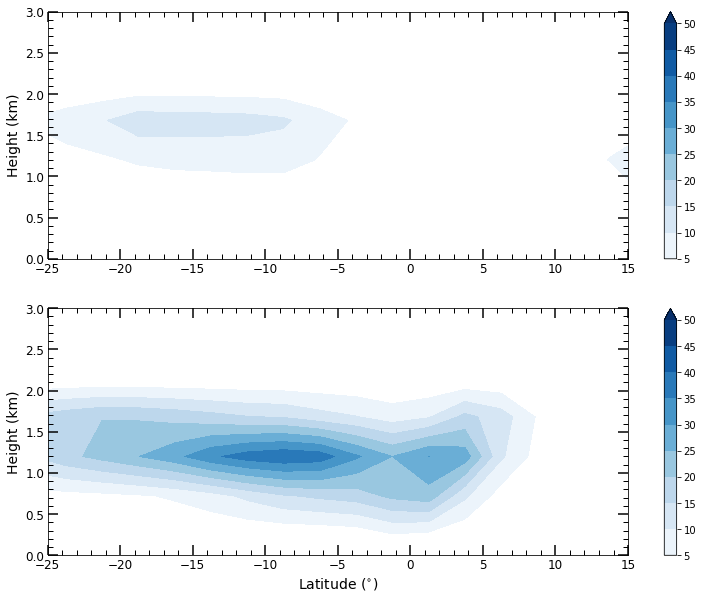

In [47]:
npan = 2
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(13, 10))#, tight_layout='true')
for j in range(0,npan,1):
   ax1 = fig.add_subplot(npan,1,j+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=12, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=12, right='True', top='True')
   ax1.tick_params(axis='x', labelsize=12)
   ax1.tick_params(axis='y', labelsize=12)
   #plt.gca().invert_yaxis() 
   plt.ylabel('Height (km)', fontsize=14)
   #plt.xlabel('Latitude ($^{\circ}$)', fontsize=14)
   plt.xlim(-25,15)
   plt.ylim(0,3) 
   if j == 10:
       #plt.title('Potential temperature (K) over the US on '+str(timec))
       cf = plt.contourf(sc_yz['lat'], sc_yz['alt'], sc_yz[11,:,:]*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 0:
       #plt.title('Potential temperature (K) over the US on '+str(timec))
       cf = plt.contourf(sc_yz['lat'], sc_yz['alt'], sc_yz[2,:,:]*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 20:
       #plt.title('Potential temperature (K) over the US on '+str(timec))
       cf = plt.contourf(sc_yz['lat'], sc_yz['alt'], sc_yz[5,:,:]*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 1:
       #plt.title('Potential temperature (K) over the US on '+str(timec))
       cf = plt.contourf(sc_yz['lat'], sc_yz['alt'], sc_yz[8,:,:]*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cb = plt.colorbar(cf,orientation = 'vertical')
       plt.xlabel('Latitude ($^{\circ}$)', fontsize=14)

In [48]:
# create density contour array based on min and max values
lev_sc = np.arange(4., 44., 4.)
color_map_blu = plt.cm.get_cmap('Blues')

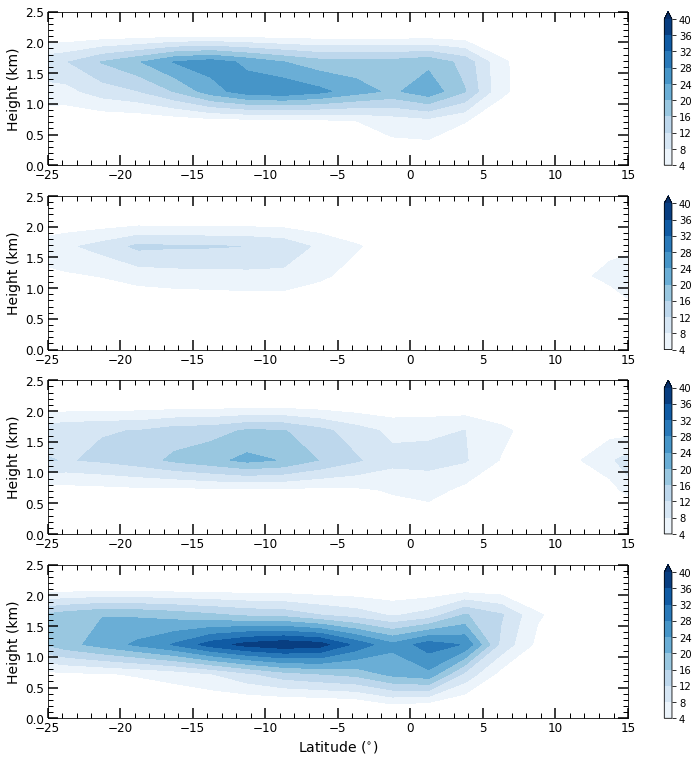

In [49]:
npan = 4
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(13, 13))#, tight_layout='true')
for j in range(0,npan,1):
   ax1 = fig.add_subplot(npan,1,j+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=12, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=12, right='True', top='True')
   ax1.tick_params(axis='x', labelsize=12)
   ax1.tick_params(axis='y', labelsize=12)
   #plt.gca().invert_yaxis() 
   plt.ylabel('Height (km)', fontsize=14)
   #plt.xlabel('Latitude ($^{\circ}$)', fontsize=14)
   plt.xlim(-25,15)
   plt.ylim(0,2.5) 
   if j == 0:
       #plt.title('Potential temperature (K) over the US on '+str(timec))
       cf = plt.contourf(sc_yz['lat'], sc_yz['alt'], sc_yz[11,:,:]*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 1:
       #plt.title('Potential temperature (K) over the US on '+str(timec))
       cf = plt.contourf(sc_yz['lat'], sc_yz['alt'], sc_yz[2,:,:]*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 2:
       #plt.title('Potential temperature (K) over the US on '+str(timec))
       cf = plt.contourf(sc_yz['lat'], sc_yz['alt'], sc_yz[5,:,:]*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 3:
       #plt.title('Potential temperature (K) over the US on '+str(timec))
       cf = plt.contourf(sc_cc_yz['lat'], sc_yz['alt'], sc_yz[8,:,:]*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cb = plt.colorbar(cf,orientation = 'vertical')
       plt.xlabel('Latitude ($^{\circ}$)', fontsize=14)

In [50]:
#0.72,  1.2
lat0 = -8.75
lat1 = -6.25
sc_cc_tz_7S = sc_cc_yz.sel(lat=slice(lat0,lat1)).mean(dim=('lat'))
sc_tz_7S = sc_yz.sel(lat=slice(lat0,lat1)).mean(dim=('lat'))

lat0 = -11.25
lat1 = -8.75
sc_cc_tz_10S = sc_cc_yz.sel(lat=slice(lat0,lat1)).mean(dim=('lat'))
sc_tz_10S = sc_yz.sel(lat=slice(lat0,lat1)).mean(dim=('lat'))

lat0 = -16.25
lat1 = -13.75
sc_cc_tz_15S = sc_cc_yz.sel(lat=slice(lat0,lat1)).mean(dim=('lat'))
sc_tz_15S = sc_yz.sel(lat=slice(lat0,lat1)).mean(dim=('lat'))

lat0 = -1.25
lat1 = 1.25
sc_cc_tz_EQ = sc_cc_yz.sel(lat=slice(lat0,lat1)).mean(dim=('lat'))
sc_tz_EQ = sc_yz.sel(lat=slice(lat0,lat1)).mean(dim=('lat'))

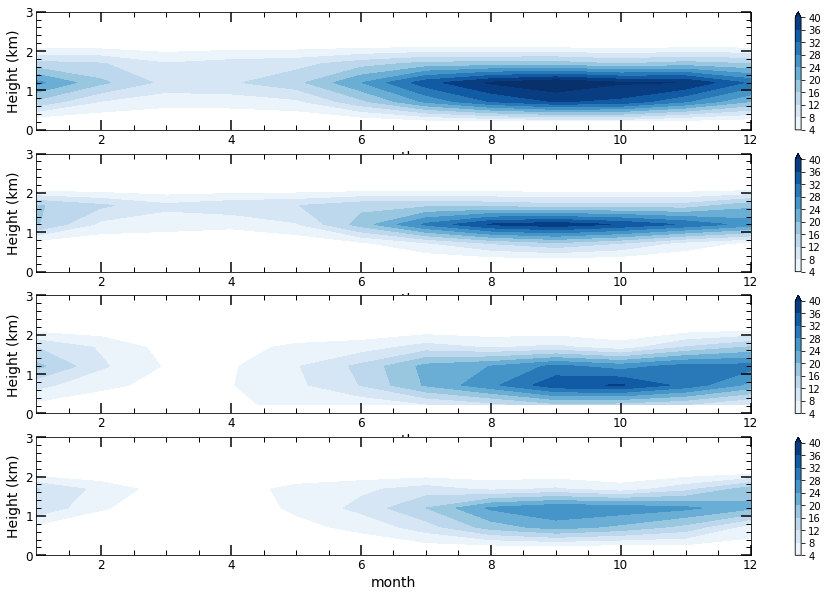

In [51]:
npan = 4
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(16, 10))#, tight_layout='true')
for j in range(0,npan,1):
   ax1 = fig.add_subplot(npan,1,j+1)
   plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=12, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=12, right='True', top='True')
   ax1.tick_params(axis='x', labelsize=12)
   ax1.tick_params(axis='y', labelsize=12)
   #plt.gca().invert_yaxis() 
   plt.ylabel('Height (km)', fontsize=14)
   plt.xlabel('month', fontsize=14)
   plt.ylim(0,3) 
   if j == 0:
       #plt.title('Potential temperature (K) over the US on '+str(timec))
       cf = plt.contourf(month, sc_cc_tz_7S['alt'], sc_cc_tz_7S.transpose()*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 1:
       #plt.title('Potential temperature (K) over the US on '+str(timec))
       cf = plt.contourf(month, sc_tz_7S['alt'], sc_tz_7S.transpose()*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 2:
       #plt.title('Potential temperature (K) over the US on '+str(timec))
       cf = plt.contourf(month, sc_cc_tz_EQ['alt'], sc_cc_tz_EQ.transpose()*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cb = plt.colorbar(cf,orientation = 'vertical')
   if j == 3:
       #plt.title('Potential temperature (K) over the US on '+str(timec))
       cf = plt.contourf(month, sc_tz_EQ['alt'], sc_tz_EQ.transpose()*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cb = plt.colorbar(cf,orientation = 'vertical')
#fig.tight_layout()


In [52]:
# create density contour array based on min and max values
lev_sc = np.arange(5., 55., 5.)
color_map_blu = plt.cm.get_cmap('Blues')

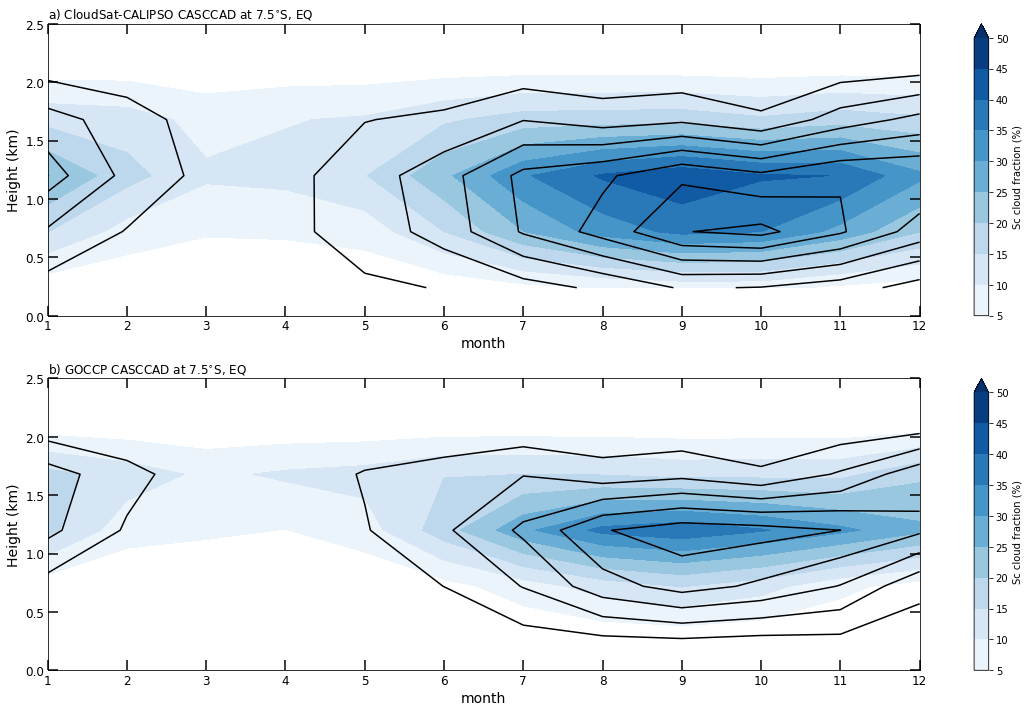

In [54]:
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

npan = 2
# all of the sizes are double the size they'll be in the paper 
fig = plt.figure(figsize=(16, 10))#, tight_layout='true')
for j in range(0,npan,1):
   ax1 = fig.add_subplot(npan,1,j+1)
   #plt.minorticks_on()
   ax1.tick_params(axis='both', which='major', length=10, width=1.5, direction='in', labelsize=12, right='True', top='True')
   ax1.tick_params(axis='both', which='minor', length= 5, width=1.0, direction='in', labelsize=12, right='True', top='True')
   ax1.tick_params(axis='x', labelsize=12)
   ax1.tick_params(axis='y', labelsize=12)
   #plt.gca().invert_yaxis() 
   plt.ylabel('Height (km)', fontsize=14)
   plt.xlabel('month', fontsize=14)
   plt.ylim(0,2.5) 
   if j == 0:
       plt.title(r'a) CloudSat-CALIPSO CASCCAD at 7.5$^{\circ}$S, EQ',loc='left')
       cf = plt.contourf(month, sc_cc_tz_7S['alt'], sc_cc_tz_7S.transpose()*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cl = plt.contour(month, sc_cc_tz_EQ['alt'], sc_cc_tz_EQ.transpose()*100, colors='k', levels=lev_sc)

       cb = plt.colorbar(cf,orientation = 'vertical',label='Sc cloud fraction (%)')
   if j == 1:
       plt.title(r'b) GOCCP CASCCAD at 7.5$^{\circ}$S, EQ',loc='left')
       cf = plt.contourf(month, sc_tz_7S['alt'], sc_tz_7S.transpose()*100, cmap = color_map_blu, levels=lev_sc, extend = 'max')
       cl = plt.contour(month, sc_tz_EQ['alt'], sc_tz_EQ.transpose()*100, colors='k', levels=lev_sc)
       
       cb = plt.colorbar(cf,orientation = 'vertical',label='Sc cloud fraction (%)')
        
   locs, labels = plt.xticks()  # Get the current locations and labels.
   plt.xticks(np.arange(1, 13, step=1))  # Set label locations.

fig.tight_layout()
#plt.savefig(figfolder+'CASCAAD_monthly_7S_EQ.pdf', dpi=150)